In [26]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

In [27]:
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

In [57]:
# search_result = gis.content.search('title: medical_provider_data_geocoded_locations', 'Feature Layer')
# search_result = gis.content.search('title: npi_WY_GeocodeAddresses', 'Feature Layer')
search_result = gis.content.search('title: provider_clean_data_singleline_geocoded_locations', 'Feature Layer')

In [58]:
provider_data_item = search_result[0]
provider_data_item

<Item title:"provider_clean_data_singleline_geocoded_locations" type:Feature Layer Collection owner:portaladmin>

In [59]:
provider_data_item.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_singleline_geocoded_locations/FeatureServer/0">]

In [60]:
provider_data_layer = provider_data_item.layers[0]
provider_data_layer

<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_singleline_geocoded_locations/FeatureServer/0">

In [61]:
provider_data_layer

<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_singleline_geocoded_locations/FeatureServer/0">

In [62]:
provider_data_layer.properties.fields

[{
   "name": "user_npi",
   "alias": "user_npi",
   "type": "esriFieldTypeDouble",
   "domain": null,
   "nullable": true,
   "editable": true
 }, {
   "name": "user_entity_type",
   "alias": "user_entity_type",
   "type": "esriFieldTypeString",
   "domain": null,
   "length": 1000000,
   "nullable": true,
   "editable": true
 }, {
   "name": "user_organization_name",
   "alias": "user_organization_name",
   "type": "esriFieldTypeString",
   "domain": null,
   "length": 1000000,
   "nullable": true,
   "editable": true
 }, {
   "name": "user_addressline1",
   "alias": "user_addressline1",
   "type": "esriFieldTypeString",
   "domain": null,
   "length": 1000000,
   "nullable": true,
   "editable": true
 }, {
   "name": "user_addressline2",
   "alias": "user_addressline2",
   "type": "esriFieldTypeString",
   "domain": null,
   "length": 1000000,
   "nullable": true,
   "editable": true
 }, {
   "name": "user_city",
   "alias": "user_city",
   "type": "esriFieldTypeString",
   "domain"

In [ ]:
for f in provider_data_layer.properties.fields:
    print(f['name'],'      ',f['type'])

#### Create dataframe for WY

In [63]:
%time wy_df = provider_data_layer.query(where="user_state='WY'", as_df=True)
wy_df.shape

Wall time: 7.76 s


(12770, 88)

In [65]:
wy_df.columns

Index(['AddNumFrom', 'AddNumTo', 'Addr_type', 'AddressNumber', 'AddressRange',
       'BldgName', 'BldgType', 'Block', 'BuildingName', 'City', 'Country',
       'DisplayX', 'DisplayY', 'Distance', 'District', 'ExtraInfo', 'LangCode',
       'LevelName', 'LevelType', 'Loc_name', 'LongLabel', 'Match_addr',
       'MetroArea', 'Neighborhood', 'OBJECTID', 'Phone', 'PlaceName',
       'Place_addr', 'Postal', 'PostalExt', 'Rank', 'Region', 'RegionAbbr',
       'SHAPE', 'Score', 'Sector', 'ShortLabel', 'Side', 'StAddr', 'StDir',
       'StName', 'StPreDir', 'StPreType', 'StType', 'Status', 'SubAddress',
       'Subregion', 'Territory', 'Type', 'URL', 'UnitName', 'UnitType', 'X',
       'X_max', 'X_min', 'Y', 'Y_max', 'Y_min', 'Zone', 'globalid', 'in_city',
       'user_addressline1', 'user_addressline2', 'user_city', 'user_country',
       'user_entity_type', 'user_full_address', 'user_npi',
       'user_organization_name', 'user_postal_code', 'user_provider_gender',
       'user_state', 'use

#### Geocoding using GeoAnalytics Server

In [93]:
map1 = gis.map('USA')
map1

MapView(layout=Layout(height='400px', width='100%'))

In [94]:
wy_df.spatial.plot(map1)

True

In [66]:
# A lot of the records are outside WY, lets check these
len(wy_df[wy_df['Region']!='Wyoming'])

3132

In [84]:
map1.remove_layers()

True

#### Create df for Arizona

In [ ]:
%time az_df = provider_data_layer.query(where="user_state='AZ'", as_df=True)
az_df.shape

In [ ]:
len(az_df[az_df['Region']!='Arizona'])

In [ ]:
az_df.columns

In [ ]:
new2_az_df = az_df[['OBJECTID', 'X','Y', 'SHAPE',
       'user_addressline1', 'user_addressline2', 'user_city', 'user_country',
       'user_entity_type', 'user_full_address', 'user_npi',
       'user_organization_name', 'user_postal_code']]

In [ ]:
new_az_df = az_df[['AddNumFrom', 'AddNumTo', 'Addr_type', 'AddressNumber', 'AddressRange',
       'BldgName', 'BldgType', 'Block', 'BuildingName', 'City', 'Country',
       'DisplayX', 'DisplayY', 'Distance', 'District', 'ExtraInfo', 'LangCode',
       'LevelName', 'LevelType', 'Loc_name', 'LongLabel', 'Match_addr',
       'MetroArea', 'Neighborhood', 'OBJECTID', 'Phone', 'PlaceName',
       'Place_addr', 'Postal', 'PostalExt', 'Rank', 'Region', 'RegionAbbr',
       'SHAPE', 'Score', 'Sector', 'ShortLabel', 'Side', 'StAddr', 'StDir',
       'StName', 'StPreDir', 'StPreType', 'StType', 'Status', 'SubAddress',
       'Subregion', 'Territory', 'Type', 'URL', 'UnitName', 'UnitType', 'X',
       'X_max', 'X_min', 'Y', 'Y_max', 'Y_min', 'Zone', 'globalid', 'in_city',
       'user_addressline1', 'user_addressline2', 'user_city', 'user_country',
       'user_entity_type', 'user_full_address', 'user_npi',
       'user_organization_name', 'user_postal_code']]

In [ ]:
new2_az_df.shape

### Rendering through Feature Layer

In [36]:
map2 = gis.map('USA')
map2

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
map2.add_layer({"type":"FeatureLayer", 
               "url":"https://datascienceqa.esri.com/server/rest/services/Hosted/medical_provider_data_geocoded_locations/FeatureServer/0", 
               "definition_expression" : "Region='Texas'",
               "renderer":"HeatmapRenderer",
#                "field_name":"user_npi",
               "opacity":0.7,
                "radius":5
              })

In [38]:
map2.remove_layers()

True

In [39]:
map3 = gis.map('USA')
map3

MapView(layout=Layout(height='400px', width='100%'))

In [40]:
f_layer = FeatureLayer("https://datascienceqa.esri.com/server/rest/services/Hosted/npi_TX_GeocodeAddresses/FeatureServer")
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
#             "minScale":291814,
#             "maxScale":77509,
            "minScale":100,
            "maxScale":10,
            "blurRadius":10,
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
#                           {"ratio":0,"color":[133,193,200,0]},
#                           {"ratio":0.01,"color":[133,193,200,0]},
#                           {"ratio":0.0925,"color":[144,161,190,179]},
#                           {"ratio":0.17500000000000002,"color":[156,129,132,179]},
#                           {"ratio":0.2575,"color":[167,97,170,179]},
#                           {"ratio":0.505,"color":[192,24,42,179]},
                            {"ratio":0.505,"color":"#7b3ce9"},
#                           {"ratio":0.5875,"color":[200,0,0,179]},
#                           {"ratio":0.67,"color":[211,51,0,179]},
#                           {"ratio":0.7525000000000001,"color":[222,102,0,179]},
#                           {"ratio":0.8350000000000001,"color":[233,153,0,179]},
                            {"ratio":1,"color":[244,204,0,179]}]
#                           {"ratio":1,"color":"#ffff00"}]
map3.add_layer(f_layer,
               { "type": "FeatureLayer",
                 "renderer": renderer,
                 "field_name":"user_npi"})


In [43]:
map3.remove_layers()

True

In [42]:

layer = {"type":"FeatureLayer", 
               "url":"https://datascienceqa.esri.com/server/rest/services/Hosted/npi_TX_GeocodeAddresses/FeatureServer"}
renderer = {"renderer": "autocast", # Tells the JS API to autocast this object
            "type":"esri.renderers.HeatmapRenderer",
                "maxPixelIntensity":2,
                "minPixelIntensity":0,
                "colorStops": [
            { "color": "rgba(63, 40, 102, 0)", "ratio": 0 },
            { "color": "#7b3ce9", "ratio": 0.581 },
            { "color": "#ffff00", "ratio": 1 }
              ]
              }

map3.add_layer(layer, renderer)

In [ ]:
map3.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -12261129.128282841,
 'ymin': 3228627.319645519,
 'xmax': -9854279.98163985,
 'ymax': 4207021.281695515}

In [ ]:
webmap_item_properties = {'title':'Texas Healthcare Providers',
                         'snippet':'Map created using Python API showing healthcare providers in TX',
                         'tags':['automation', 'providers', 'healthcare', 'python']}

map3.save(webmap_item_properties)

In [ ]:
az_df.shape

### Using Web Maps

### Provider and Population Density for TX

<Item title:"TX_Provider_PopDens" type:Web Map owner:portaladmin>
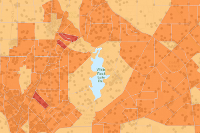

In [10]:
# Get the Provider and Population density item
search_results = gis.content.search('title: TX_Provider_PopDens', 'Web Map')

# Access the first Item that's returned
tx_provider_item = search_results[0]

tx_provider_item

In [4]:
# Create Webmap
from arcgis.widgets import MapView
tx_provider_map = MapView(item=tx_provider_item, gis=gis)
tx_provider_map.legend=True
tx_provider_map

MapView(layout=Layout(height='400px', width='100%'), legend=True)

We can see that these counties below San Antonio have 

In [12]:
for layer in tx_provider_map.layers:
    print(layer.title)
# tx_provider_map.remove_layer(tx_provider_map.layers[1])

npi_TX_GeocodeAddresses - copy
npi_TX_GeocodeAddresses
2018 USA Population Density


### Calling different layers to create webmap

In [53]:
map4 = gis.map('USA')
map4

MapView(layout=Layout(height='400px', width='100%'))

In [56]:
pop_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")
map4.add_layer(pop_layer,
               { "type": "MapImageLayer"})

In [55]:
map4.remove_layers()

True

### Provider density and Median Income for Texas

<Item title:"TX_Provider_MedianIncome" type:Web Map owner:portaladmin>
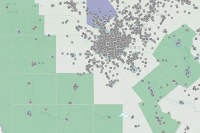

In [11]:
# Get the Provider density and Median Income webmap item
tx_med_income = gis.content.search('title: TX_Provider_MedianIncome',
                                    'Web Map')

# Access the first Item that's returned
tx_med_income_item = tx_med_income[0]

tx_med_income_item

In [61]:
# Display Webmap
tx_income_map = WebMap(tx_med_income_item)
tx_income_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [12]:
from arcgis.widgets import MapView
tx_income_map = MapView(item=tx_med_income_item, gis=gis)
tx_income_map.legend = True
tx_income_map

MapView(layout=Layout(height='400px', width='100%'), legend=True)


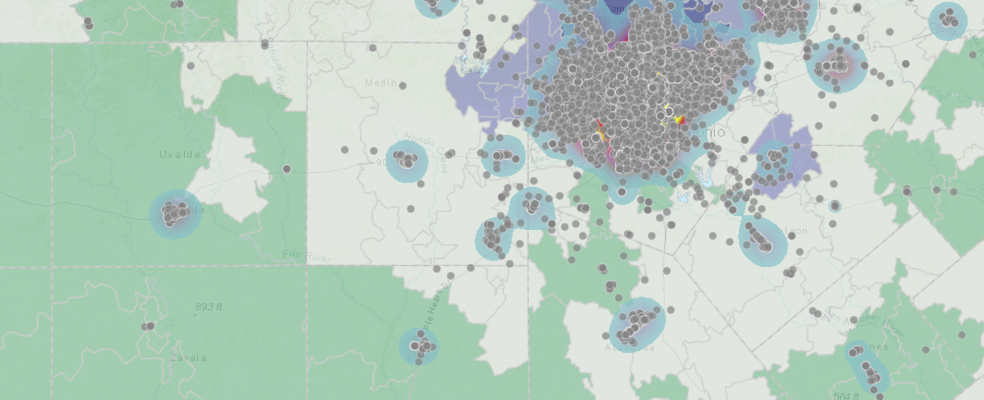

In [28]:
mv.take_screenshot()

In [27]:
for layer in tx_provider_map.layers:
    print(layer.title)

npi_TX_GeocodeAddresses - copy


In [41]:
map4 = gis.map('USA')
map4

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
f1_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

In [38]:
map4.add_layer(f1_layer,
               { "type": "FeatureLayer"})

In [49]:
map4.remove_layers()

True

In [52]:
# Get the Provider density and Median Income webmap item
med_income = gis.content.search('title: 2018 USA Median Household Income',
                                    'Map Image Layer')

# Access the first Item that's returned
med_income_item = med_income[0]

med_income_item

IndexError: list index out of range

In [50]:
map4.add_layer({"type":"MapImageLayer", 
               "url":"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer"})

In [55]:
item = gis.content.search("title: 2018 USA Population Density", item_type="Feature Layer")
item

[]

In [56]:
item.layers

AttributeError: 'list' object has no attribute 'layers'

In [25]:
arcgis.__version__

'1.6.1'

In [40]:
flayer_search_result = gis.content.search("owner:esri","Feature Layer", outside_org=True)
flayer_search_result

[]